In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("smallFlows.xlsx")

In [9]:
df = df.assign(time = lambda dataset: pd.to_datetime(dataset.time, unit = 's'))

In [10]:
df

,time,src,dst,proto,src_port,dst_port,packets,bytes,duration
0,2011-01-25 18:52:22.484409088,192.168.3.131,72.14.213.138,TCP,NaN,80.0,13.0,4887,248.961998
1,2011-01-25 18:52:22.708292096,192.168.3.131,72.14.213.102,TCP,NaN,80.0,9.0,1953,0.058485
2,2011-01-25 18:52:22.928128000,192.168.3.131,72.14.213.147,TCP,NaN,443.0,306.0,122925,244.864249
3,2011-01-25 18:52:23.103558912,192.168.3.131,65.55.206.209,TCP,NaN,80.0,6.0,1099,0.363032
4,2011-01-25 18:52:23.337240832,192.168.3.131,65.55.17.37,TCP,NaN,80.0,NaN,28053,1.776718
...,...,...,...,...,...,...,...,...,...
631,2011-01-25 18:57:18.160007936,192.168.3.131,66.235.136.89,TCP,NaN,443.0,13.0,6670,0.333921
632,2011-01-25 18:57:18.177888000,192.168.3.131,204.14.234.101,TCP,NaN,8443.0,11.0,6877,0.251001
633,2011-01-25 18:57:18.360007936,192.168.3.131,66.235.136.89,TCP,NaN,8443.0,13.0,6670,0.333921
634,2011-01-25 18:57:19.584353024,192.168.3.131,204.14.234.85,TCP,NaN,80.0,4.0,228,0.037452


In [22]:
df.groupby("src").size().sort_values(ascending = False).head(19)

src
192.168.3.131     371
172.16.255.1      149
10.0.2.15          41
212.8.163.80        7
204.9.163.160       4
10.1.1.2            4
70.37.129.34        3
207.46.125.253      3
213.166.51.4        2
212.8.166.36        2
65.55.116.184       2
65.55.15.244        2
207.46.125.254      2
207.46.113.78       2
65.55.25.60         2
204.9.163.184       2
194.165.188.79      2
194.165.188.76      2
91.103.140.2        2
dtype: int64

In [23]:
df.groupby("dst").size().sort_values(ascending = False).head(19)

dst
172.16.255.1      46
65.54.95.140      35
65.54.95.75       34
208.82.236.129    32
65.54.95.68       30
10.0.2.15         29
72.14.213.103     24
208.82.236.130    17
204.14.234.85     16
72.14.213.102     16
10.0.2.3          15
207.46.148.38     13
208.50.77.134     12
65.54.95.39        9
66.235.139.121     9
67.215.65.132      7
204.9.163.158      7
184.85.226.161     7
208.50.77.73       6
dtype: int64

In [25]:
df.groupby("proto").size().sort_values(ascending = False)

proto
TCP    485
UDP    147
dtype: int64

In [56]:
df_sum = df.groupby(["src", "dst"], as_index = False).sum().sort_values("duration", ascending = False).head(30)

In [57]:
import networkx as nx

In [58]:
network = nx.from_pandas_edgelist(df_sum, source = "src", target = "dst", edge_attr = "duration")

In [59]:
network.nodes()

NodeView(('10.0.2.15', '10.0.2.3', '192.168.3.131', '204.14.234.85', '172.16.255.1', '184.85.226.161', '72.14.213.147', '65.55.5.232', '65.54.95.140', '207.46.125.253', '128.241.90.211', '65.54.95.75', '65.55.206.199', '72.14.213.18', '72.14.213.138', '65.54.95.68', '72.14.213.102', '204.9.163.166', '207.46.125.254', '72.14.213.103', '72.14.213.101', '65.55.5.231', '65.55.239.163', '206.108.207.139', '147.31.122.1', '208.88.186.244', '192.168.3.90', '66.220.149.32', '195.27.155.11', '206.108.207.138', '172.16.255.255', '207.46.0.109', '213.146.189.205'))

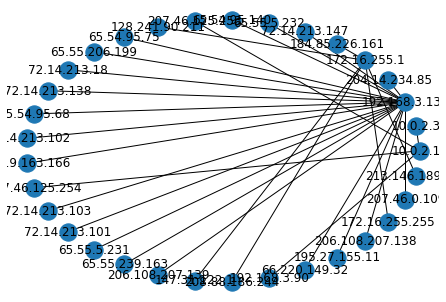

In [60]:
nx.draw_circular(network, with_labels = True)

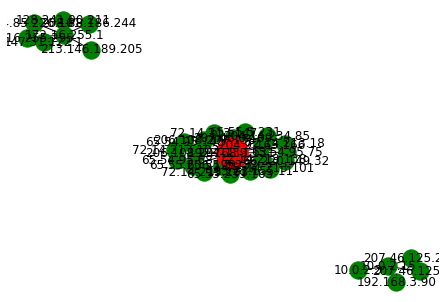

In [62]:
import matplotlib.pyplot as plt

suspect = '192.168.3.131'
pos = nx.spring_layout(network)
nx.draw(network, pos, node_color = 'green', 
        node_size = 300, with_labels = True)

options = {'node_size': 1000, 'node_color': 'r'}
nx.draw_networkx_nodes(network, pos, nodelist = [suspect], **options)

plt.show()